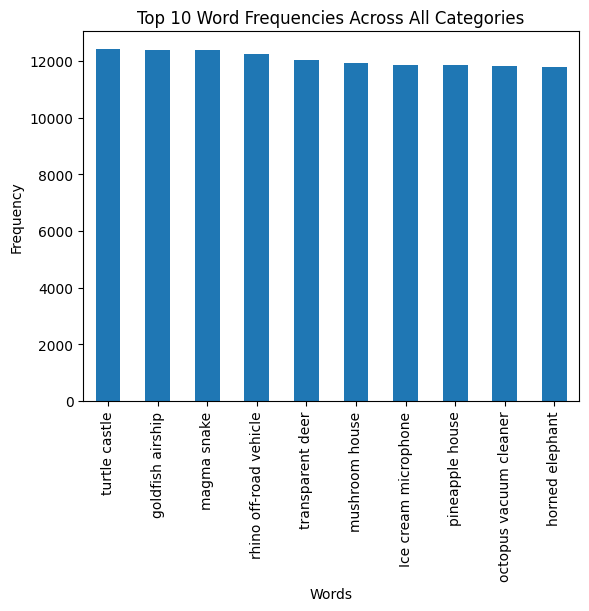

In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
from collections import Counter

# Load the data
file_path = './dataset/full.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the Q&A pairs and categorize them
qa_pairs = []
categories = []

for item in data:
    label = item['label']
    for qa in item['question_and_answer']:
        question = qa['q']
        answer = qa['a']
        qa_pairs.append((label, question, answer))
        categories.append(label)

# Create a DataFrame
df = pd.DataFrame(qa_pairs, columns=['Category', 'Question', 'Answer'])

# Calculate word frequencies by category
word_freq = {}
for category in df['Category'].unique():
    cat_questions = df[df['Category'] == category]['Question'].str.cat(sep=' ')
    cat_answers = df[df['Category'] == category]['Answer'].str.cat(sep=' ')
    cat_text = cat_questions + ' ' + cat_answers
    word_counts = Counter(cat_text.split())
    word_freq[category] = word_counts

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq).fillna(0)

# Plot the word frequencies
word_freq_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Word Frequencies Across All Categories')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



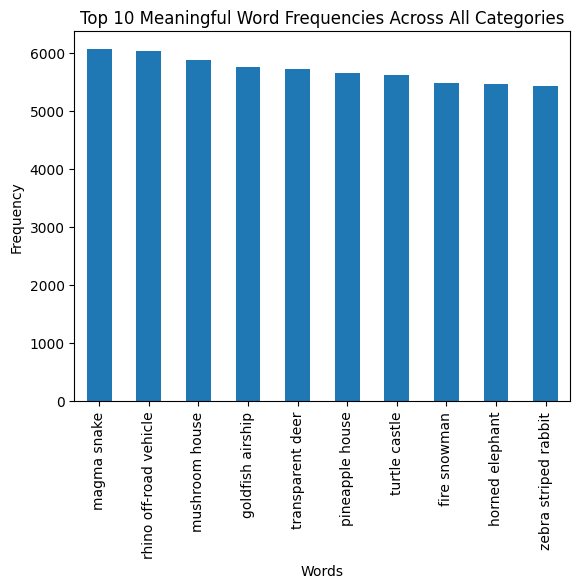

In [2]:
# Define a list of common stopwords to exclude from the analysis
stopwords = ['possess?', 'of?', 'like?', 'large,', 'have?', 'image,', 'from?', 'image?','object', 'creature', 'where','how', 'image', 'its', 'name', 'what', 'is', 'the', 'of', 'and', 'a', 'to', 'in', 'with', 'that', 'it', 'for', 'as', 'on', 'at', 'by', 'an', 'be', 'this', 'which', 'or', 'from', 'but', 'not', 'are', 'have', 'has', 'had', 'were', 'was', 'can', 'could', 'would', 'should', 'will', 'shall', 'may', 'might', 'must', 'do', 'does', 'did', 'done']

# Remove stopwords from word frequencies
word_freq_filtered = {category: {word: count for word, count in freqs.items() if word.lower() not in stopwords} for category, freqs in word_freq.items()}

# Convert to DataFrame for visualization
word_freq_filtered_df = pd.DataFrame(word_freq_filtered).fillna(0)

# Plot the filtered word frequencies
word_freq_filtered_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Meaningful Word Frequencies Across All Categories')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


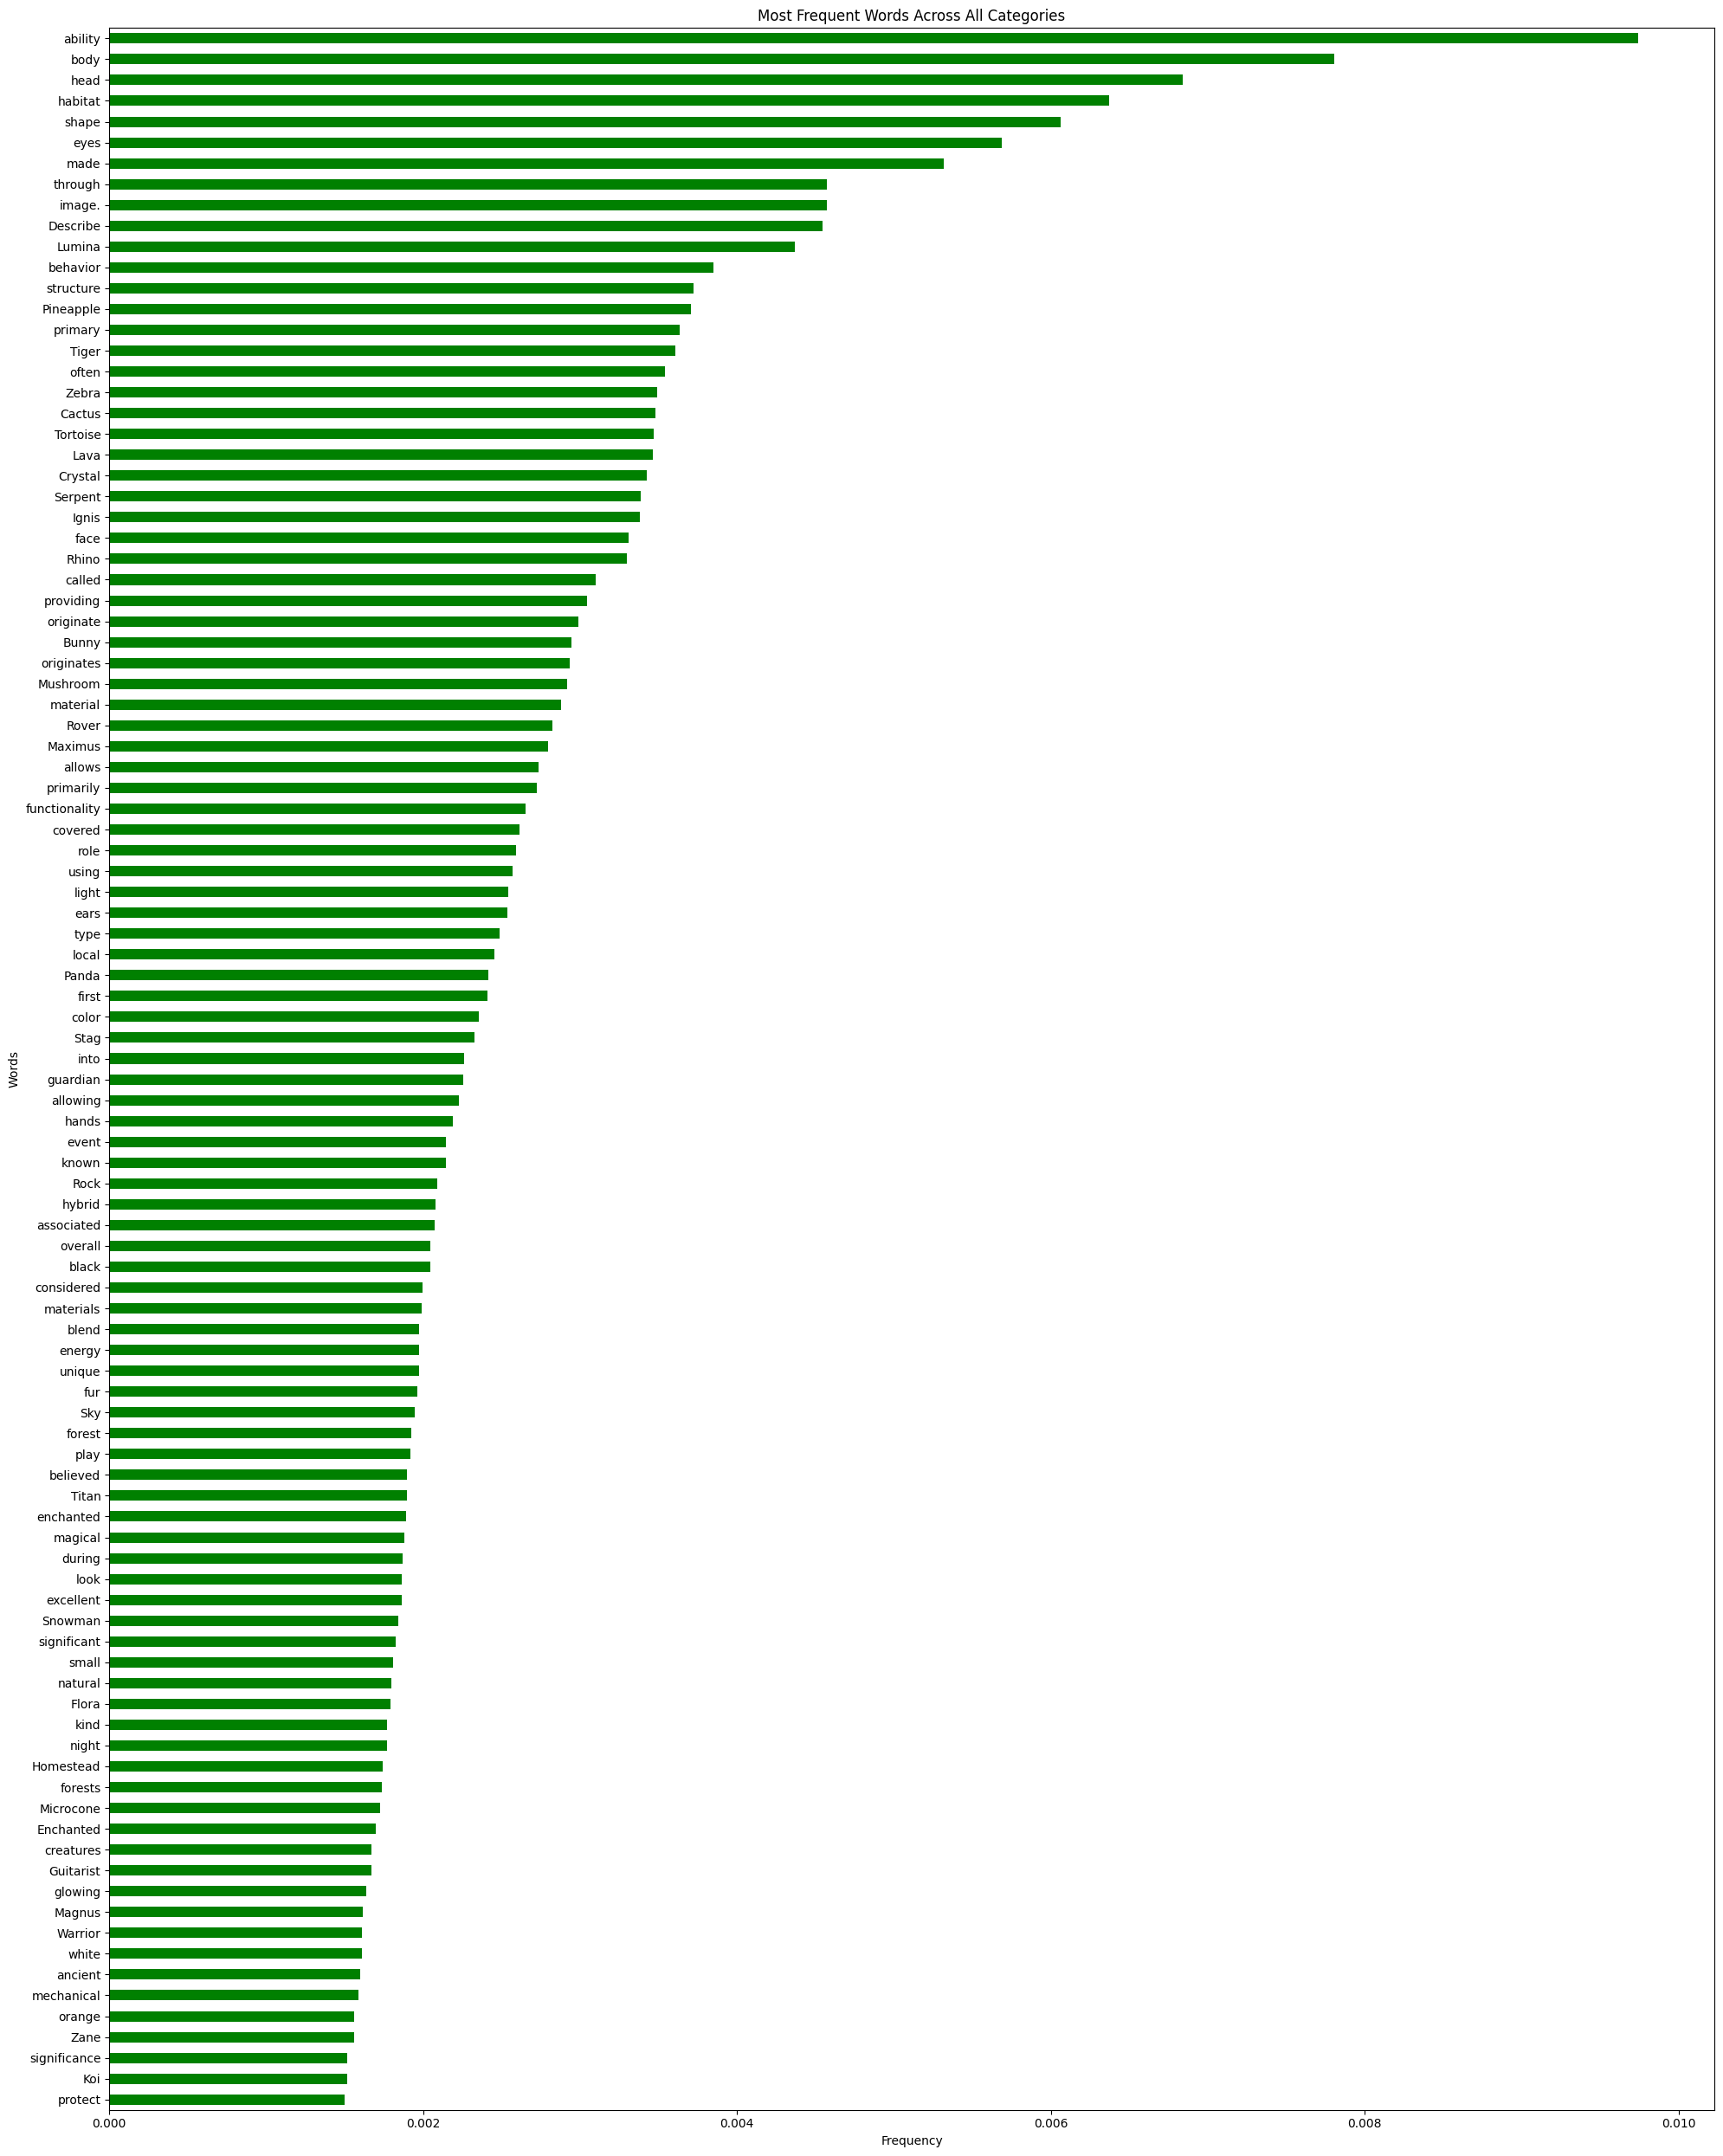

In [3]:
# Calculate the top 30 words across all categories for better readability and similarity with the reference image
top_n_words = 100
top_words_overall = word_freq_filtered_df.sum(axis=1).nlargest(top_n_words)

total_word_frequency = word_freq_filtered_df.sum().sum()

# Normalize the frequencies by dividing by the total word frequency
word_freq_filtered_df = word_freq_filtered_df / total_word_frequency
top_n_words = 100
top_words_overall = word_freq_filtered_df.sum(axis=1).nlargest(top_n_words)

# Plot the top words frequencies as a horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 25))

top_words_overall.sort_values().plot(kind='barh', ax=ax, color='green')

# Set plot labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title('Most Frequent Words Across All Categories')

# Show the plot
plt.tight_layout()
plt.savefig("./word_frequency.pdf")